<a href="https://colab.research.google.com/github/rtomek9/DS3001Group23CHDProject/blob/main/CHD_Cleaning_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/DS3001/project_chd/

Cloning into 'project_chd'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 13 (delta 2), reused 1 (delta 1), pack-reused 10
Receiving objects: 100% (13/13), 635.39 KiB | 2.01 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
import pandas as pd

df = pd.read_csv('/content/project_chd/fhs_train.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [6]:
df.columns.unique()

# Cleaning sysBP, diaBP, BMI, heartRate, glucose

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
df['sysBP'].unique()

array([143. , 122. , 112. , 130. , 124. , 126. , 171.5, 138. , 114. ,
       134.5, 100.5, 135. , 117.5, 133. , 142. , 120. , 131. , 113. ,
       110. , 131.5, 101. ,  96. , 102.5, 127.5, 116. , 162. , 146. ,
       115. , 127. , 140.5, 132. , 112.5, 145. , 148. , 141. , 150. ,
        99. , 195. , 107.5, 109. , 116.5, 165. , 149. , 183. ,  93.5,
       140. , 124.5, 193. , 122.5, 119. , 102. , 134. , 132.5, 128. ,
       141.5, 111. , 106. , 129. , 178. , 125. , 136. , 137.5, 151.5,
       153. , 125.5, 188. , 174. , 142.5, 157. , 111.5, 113.5, 192.5,
       105.5, 146.5, 160. , 147. , 158. , 214. , 151. , 152. , 155.5,
       155. , 144. , 117. , 121. , 105. , 115.5, 160.5, 137. , 126.5,
       118. , 190. , 184.5,  94. , 180. , 147.5, 108. , 199. , 130.5,
       119.5,  95. , 118.5, 175. , 154. , 152.5, 197. , 103. , 150.5,
       139. , 100. , 133.5, 143.5, 173. , 107. , 123. , 220. , 168.5,
       187. , 106.5, 205. , 164.5,  98. , 108.5, 172.5, 185. , 163. ,
       159. , 120.5,

In [8]:
df['sysBP'].value_counts()

sysBP
110.0    72
130.0    71
120.0    70
115.0    69
125.0    68
         ..
213.0     1
187.5     1
85.0      1
201.0     1
169.5     1
Name: count, Length: 229, dtype: int64

<Axes: ylabel='Density'>

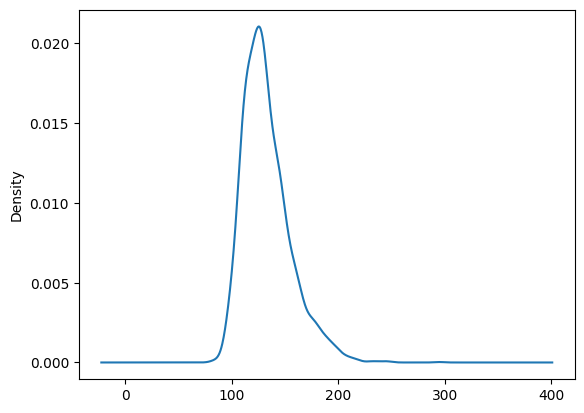

In [9]:
df['sysBP'].plot.density()

In [10]:
df['diaBP'].unique()

array([104. ,  82. ,  71. ,  94. ,  92. ,  83. , 105.5,  96. ,  76. ,
        87. ,  66. ,  80. ,  82.5,  86. ,  90. ,  85. ,  68. ,  77.5,
        68.5,  72. ,  72.5,  81.5,  91. ,  84. ,  78. ,  75. ,  66.5,
        76.5,  95. ,  77. ,  93. ,  70. ,  62. , 100. , 110. ,  73. ,
        81. ,  62.5, 108. ,  58. ,  92.5,  79. ,  69. ,  89.5,  85.5,
       103. ,  61. ,  88. , 106. ,  71.5,  63.5,  97. , 104.5,  98. ,
        74. , 113. ,  60. ,  57.5,  73.5,  86.5,  65. , 109. , 102. ,
        99.5,  84.5,  80.5,  70.5,  78.5,  90.5,  74.5,  67.5,  67. ,
        88.5,  89. ,  99. ,  97.5,  50. , 118. ,  63. ,  79.5,  98.5,
       128. , 107.5, 130. ,  87.5, 105. , 101. ,  91.5, 124. , 123. ,
       107. ,  94.5, 106.5, 100.5, 111. ,  75.5,  64. , 103.5, 115. ,
       121. ,  95.5,  57. ,  64.5, 119. , 112. , 102.5,  93.5,  83.5,
       129. ,  69.5, 120. ,  59. , 109.5,  55. ,  96.5, 112.5, 133. ,
        54. , 115.5,  65.5, 114. , 125. ,  52. , 110.5, 135. ,  59.5,
       116. , 108.5,

In [11]:
df['diaBP'].value_counts()

diaBP
80.0     198
82.0     106
84.0     102
85.0     102
81.0      98
        ... 
115.5      1
135.0      1
110.5      1
129.0      1
122.5      1
Name: count, Length: 139, dtype: int64

<Axes: ylabel='Density'>

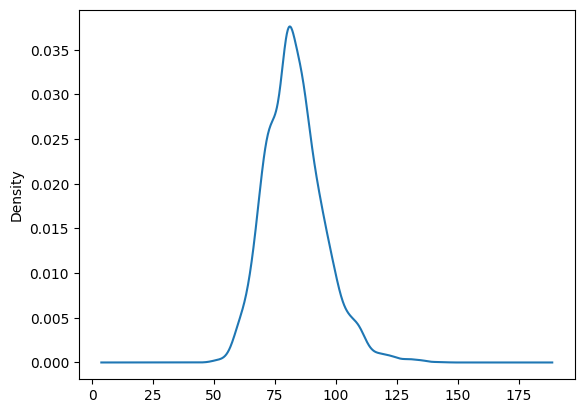

In [12]:
df['diaBP'].plot.density()

In [13]:
df['BMI'].unique()

array([29.85, 22.16, 25.68, ..., 37.04, 38.31, 26.78])

In [14]:
df['BMI'].value_counts()

BMI
23.48    17
22.91    15
22.54    12
23.09    12
25.09    11
         ..
17.65     1
29.46     1
32.81     1
23.83     1
26.78     1
Name: count, Length: 1234, dtype: int64

<Axes: ylabel='Density'>

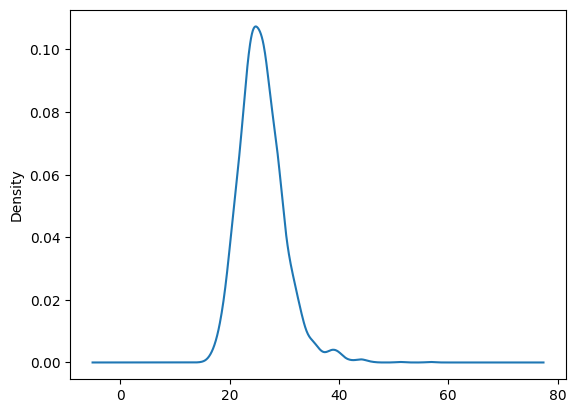

In [15]:
df['BMI'].plot.density()

In [16]:
df['heartRate'].unique()

array([ 75,  85,  80, 110,  91,  63,  70,  44, 103,  58,  74,  95,  78,
        60,  81,  68,  79, 100,  72,  93,  66,  77,  69,  76,  65,  67,
        54,  62,  90,  73, 120, 106, 115,  50,  64,  82,  98,  57,  83,
        88,  84,  86,  92,  56,  96,  94,  87, 108,  55,  71,  52, 102,
       107,  51,  61,  53,  89, 105,  59, 140, 104,  99, 125, 112, 122,
        48,  46,  97,  47, 130])

In [17]:
df['heartRate'].value_counts()

heartRate
75     428
80     273
70     226
60     174
85     170
      ... 
51       1
46       1
97       1
47       1
130      1
Name: count, Length: 70, dtype: int64

<Axes: ylabel='Density'>

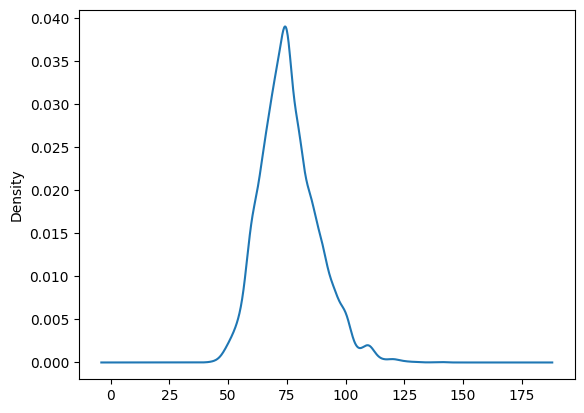

In [18]:
df['heartRate'].plot.density()

In [19]:
df['glucose'].unique()

array([ 87.,  77.,  nan,  75.,  74., 104.,  69.,  90.,  91.,  81.,  89.,
        86.,  84.,  73.,  95.,  65., 103.,  76.,  85.,  92.,  72.,  62.,
        93.,  68.,  67., 122., 102.,  79.,  66.,  83.,  78.,  64.,  63.,
        58.,  71., 115.,  70.,  96.,  60.,  82.,  94.,  88., 167., 117.,
       215.,  48., 108., 268., 100.,  80.,  99., 135.,  97.,  55., 274.,
        40., 118.,  47.,  56., 112., 248., 107., 105.,  61., 260., 170.,
       148., 120., 225.,  98.,  59., 332., 110., 206., 129.,  57., 114.,
       101., 113., 111., 127., 121.,  45., 147.,  50., 244., 106., 394.,
       173., 116., 137., 145., 123.,  44., 172.,  54., 142., 348., 119.,
       320.,  53., 136., 210.,  43., 144., 292., 125., 294., 130., 131.,
       255., 160.,  52., 207., 297., 216., 166., 109., 126., 235., 140.,
       270., 250., 193., 256., 150., 202., 254., 370., 191., 186.])

In [20]:
df['glucose'].value_counts()

glucose
75.0     147
77.0     126
73.0     119
80.0     117
70.0     113
        ... 
348.0      1
119.0      1
320.0      1
136.0      1
186.0      1
Name: count, Length: 130, dtype: int64

In [21]:
df['glucose'].agg('mean')

81.83350604490501

In [22]:
# Na's are minimal, impute with avg
df['glucose'] = df['glucose'].fillna(df['glucose'].agg('mean'))

<Axes: ylabel='Density'>

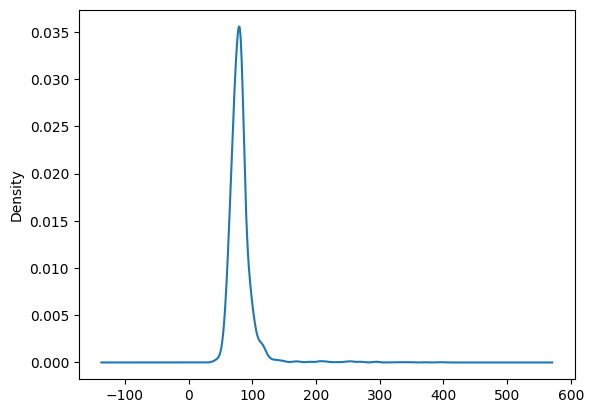

In [23]:
df['glucose'].plot.density()

<Axes: xlabel='glucose', ylabel='Density'>

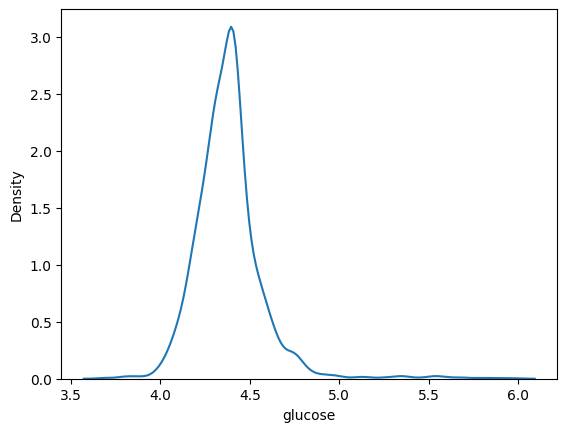

In [24]:
sns.kdeplot(x=np.log(df['glucose'])) # log version to see

<Axes: xlabel='glucose', ylabel='Density'>

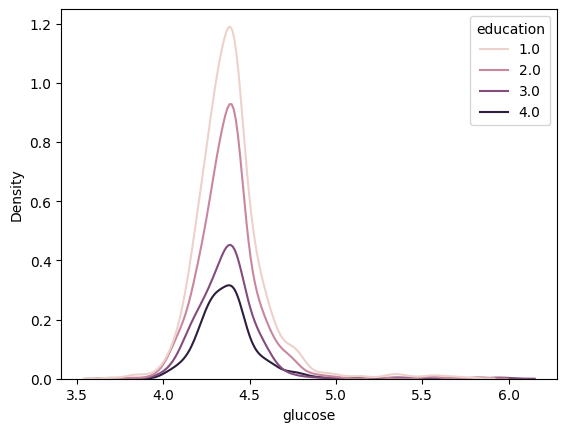

In [34]:
sns.kdeplot(x=np.log(df['glucose']),hue=df['education']) # log version to see

In [40]:
df.cov()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Unnamed: 0,1.517280e+06,17.434038,34.326639,4.014924,8.412547,75.143472,2.500966,2.064625,9.911469,9.338002,-138.045666,-39.129716,-54.578157,9.199086,624.361536,867.662727,-8.649515
sex,1.743404e+01,0.245591,-0.165136,0.003379,0.049090,1.952229,-0.003672,0.000285,0.002481,0.001592,-1.580207,-0.307360,0.386547,0.171114,-0.653138,0.177973,0.017339
age,3.432664e+01,-0.165136,73.232442,-1.528810,-0.926900,-20.714517,0.166145,0.044884,1.194000,0.128462,100.900556,76.056762,21.336138,4.893364,-1.731158,20.271364,0.695269
education,4.014924e+00,0.003379,-1.528810,1.022393,0.007578,0.069464,-0.002376,-0.002617,-0.039805,-0.006646,-1.249426,-3.194323,-0.834117,-0.628487,-0.921029,-0.956447,-0.019231
currentSmoker,8.412547e+00,0.049090,-0.926900,0.007578,0.249995,4.603262,-0.004375,-0.001355,-0.023023,-0.003065,-0.556362,-1.501099,-0.617752,-0.364905,0.388274,-0.651277,0.000296
cigsPerDay,7.514347e+01,1.952229,-20.714517,0.069464,4.603262,144.329084,-0.096202,-0.029915,-0.377208,-0.066737,-8.365116,-24.678706,-7.309195,-4.756061,11.578424,-16.733623,0.206749
BPMeds,2.500966e+00,-0.003672,0.166145,-0.002376,-0.004375,-0.096202,0.028723,0.001721,0.020134,0.001456,0.553003,0.958711,0.407810,0.063776,-0.011924,0.105385,0.005365
prevalentStroke,2.064625e+00,0.000285,0.044884,-0.002617,-0.001355,-0.029915,0.001721,0.006562,0.002598,-0.000172,-0.032999,0.102240,0.037913,0.001664,-0.023839,0.009226,0.001819
prevalentHyp,9.911469e+00,0.002481,1.194000,-0.039805,-0.023023,-0.377208,0.020134,0.002598,0.218052,0.006087,3.488481,7.231762,3.446134,0.579619,0.823868,0.873494,0.027568
diabetes,9.338002e+00,0.001592,0.128462,-0.006646,-0.003065,-0.066737,0.001456,-0.000172,0.006087,0.025427,0.319343,0.375076,0.087992,0.056822,0.083612,2.171590,0.006068


<Axes: xlabel='totChol', ylabel='sysBP'>

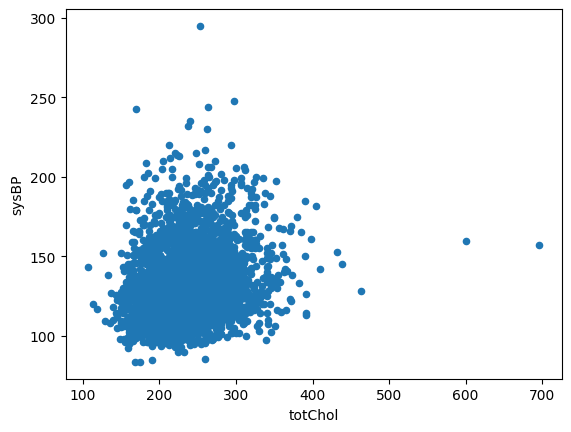

In [42]:
df.plot.scatter(y='sysBP',x='totChol')

<Axes: xlabel='diaBP', ylabel='sysBP'>

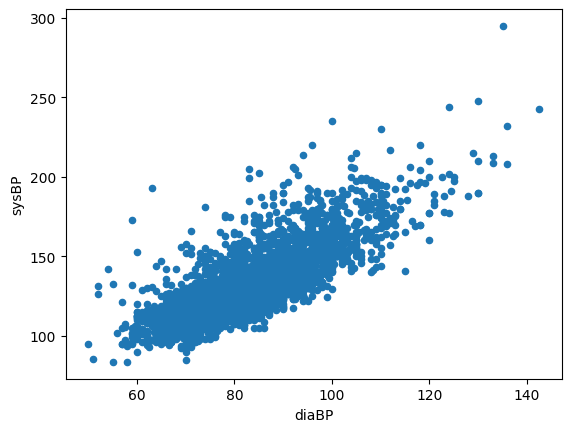

In [43]:
# sysBp and diaBP are very correlated, as to be expected.
df.plot.scatter(y='sysBP',x='diaBP')

<Axes: xlabel='BMI', ylabel='sysBP'>

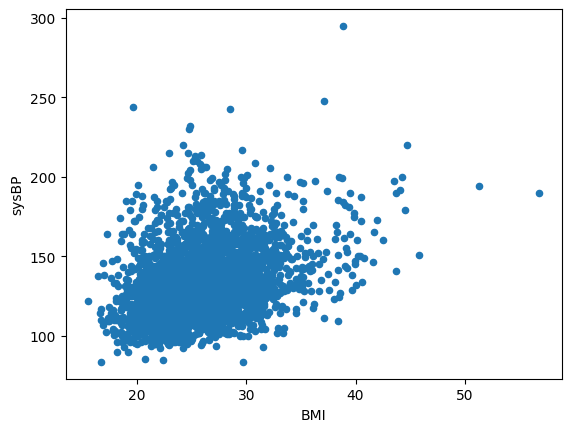

In [30]:
df.plot.scatter(y='sysBP',x='BMI')